In [91]:
import pandas as pd 
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline   
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.feature_selection import f_regression,SelectKBest,mutual_info_regression,RFE 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.metrics import explained_variance_score 
from scipy.stats import zscore 
from sklearn.utils import resample
from scipy import stats
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:
df_orig = pd.read_csv('concrete.csv')
df = df_orig.copy()
print(df.head())
print(df.shape)
print(df.info())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg     

In [3]:
for col in df.columns:
    if col!='strength':
        print(col)


cement
slag
ash
water
superplastic
coarseagg
fineagg
age


# Above are the names of the independent attributes as follows
### cement: it indicates amount of cement quantity measured in kg (kilogram) in a m3 mixture
### slag: it indicates amount of blast furnace slag quantity measured in kg (kilogram) in a m3 mixture
### ash: it indicates amount of fly ash measured in kg in a m3 mixture
### water : it indicates amount of water quantity measured in kg in a m3 mixture
### superplastic : it indicates amount of superplasticizer quantity measured in kg in a m3 mixture
### coarseagg : it indicates amount of coarse aggregate measured in kg in a m3 mixture
### fineagg : it indicates amount of fine aggregate quantity measured in kg in a m3 mixture
### age : it indicates age of the concrete mixure measured days (1~365)


In [4]:
print(df.describe())


            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730

# Above we see the statistic values of the attributes. Here are details:

### cement: the range is 102- 540. The mean is 281.16. The median is 272.90. The standard deviation value is 104.50 which is high. For 75% of the given observations, this value is less than 350.
### slag: the range of is  0- 359.40 . The mean is 73.89. The median is 22 values differ significantly indicating skewness of the distribution. The standard deviation value is 86.27. For 25% of the given observations, this value is 0.
### ash: the range is 0-200. Difference between the mean 54.18 and median 0  values is very high. The standard deviation value 64 is also high. For 50% of the given observations, this value is 0. This attribute seems to have highly skewed distribution.
### water: the range of this attribute is 121.8-247. The mean is 181.56 and median is 185 values differ slightly. The standard deviation value is 21.35. For 75% of the given observations, this value is 192. This attribute seems to have normal distribution
### superplastic: the range of this attribute is 0-32.20. Difference between the mean 6.2 and median 6.4 values is negligible. The standard deviation value is ~6. For 25% of the given observations, this value is 0.
### coarseagg: the range of this attribute is 801-1145 . The mean ~ 973 and median 968  values differ slightly. The standard deviation value is 77.75. For 75% of the given observations, this value is 1029.
### fineagg: the range of this attribute is 594-992. The mean~773 and median 779 values differ slightly. The standard deviation value is 80.17. For 25% of the given observations, this value is 731.
### age: the range of this attribute is 1-365 days. The mean ~46  and median 28  values differ significantly. The standard deviation value is ~ 63 which is quite high. For 75% of the given observations, this value is 56 days, This attribute seems to have skewed distribution.

In [5]:
print(df.isnull().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


## As seen above there are no missing values

## Below we will check and see statistics, distribution wrt to strength and 
## outlier analysis of various attributes

## -Cement

Range of values - cement :  438.0
Minimum value cement:  102.0
Maximum value cement:  540.0
Mean value cement:  281.1678640776698
Median value cement:  272.9
Standard deviation  cement:  104.50636449481536
Null values present  in cement:  False
Cement - 1st Quartile (Q1) is:  192.375
Cement - 3st Quartile (Q3) is:  350.0
Interquartile range (IQR) of Cement is  157.625
Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


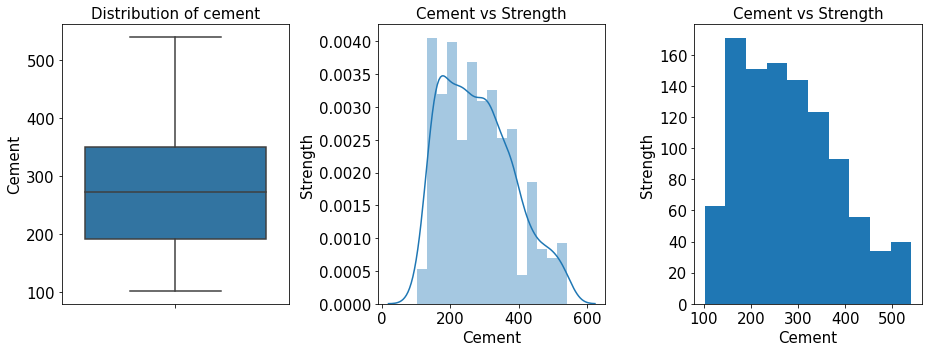

In [6]:

print('Range of values - cement : ', df['cement'].max()-df['cement'].min())
print('Minimum value cement: ', df['cement'].min())
print('Maximum value cement: ',df['cement'].max())
print('Mean value cement: ', df['cement'].mean())
print('Median value cement: ',df['cement'].median())
print('Standard deviation  cement: ', df['cement'].std())
print('Null values present  in cement: ',df['cement'].isnull().any())
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('Cement - 1st Quartile (Q1) is: ', Q1)
print('Cement - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Cement is ', stats.iqr(df['cement']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in cement upper : ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Slag

Range of values in slag:  359.4
Minimum value slag:  0.0
Maximum value slag:  359.4
Mean value slag :  73.89582524271844
Median value slag:  22.0
Standard deviation slag:  86.2793417481054
Null values slag:  False
1st Quartile (Q1) of salg is:  0.0
3st Quartile (Q3) of slag is:  142.95
Interquartile range (IQR) of slag is  142.95
Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


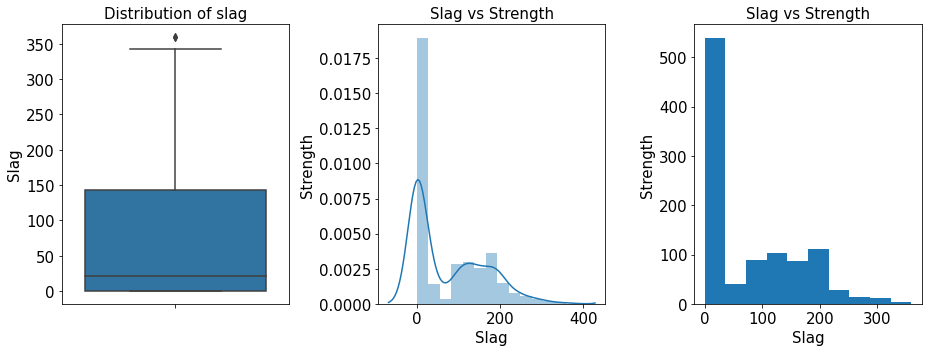

In [7]:

print('Range of values in slag: ', df['slag'].max()-df['slag'].min())
print('Minimum value slag: ', df['slag'].min())
print('Maximum value slag: ',df['slag'].max())
print('Mean value slag : ', df['slag'].mean())
print('Median value slag: ',df['slag'].median())
print('Standard deviation slag: ', df['slag'].std())
print('Null values slag: ',df['slag'].isnull().any())
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) of salg is: ', Q1)
print('3st Quartile (Q3) of slag is: ', Q3)
print('Interquartile range (IQR) of slag is ', stats.iqr(df['slag']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in slag upper : ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df[df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(df[df['slag']>357.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df[df['slag']<-214.425]['slag'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='slag',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Ash

Range of values ash :  200.1
Minimum value ash:  0.0
Maximum value ash:  200.1
Mean value ash:  54.188349514563086
Median value ash:  0.0
Standard deviation ash:  63.99700415268794
Null values ash:  False
1st Quartile (Q1) in ash is:  0.0
3st Quartile (Q3) in ash is:  118.3
Interquartile range (IQR) in ash is  118.3
Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


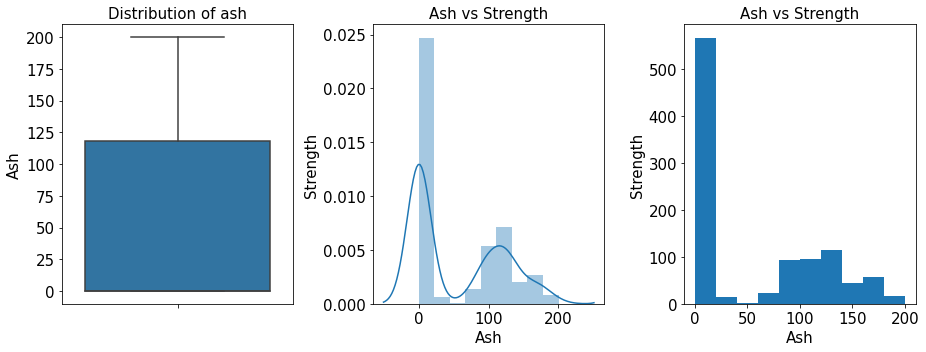

In [8]:
print('Range of values ash : ', df['ash'].max()-df['ash'].min())
print('Minimum value ash: ',df['ash'].min())
print('Maximum value ash: ',df['ash'].max())
print('Mean value ash: ', df['ash'].mean())
print('Median value ash: ',df['ash'].median())
print('Standard deviation ash: ', df['ash'].std())
print('Null values ash: ',df['ash'].isnull().any())
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) in ash is: ', Q1)
print('3st Quartile (Q3) in ash is: ', Q3)
print('Interquartile range (IQR) in ash is ', stats.iqr(df['ash']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in ash upper : ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', df[df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(df[df['ash']>295.75]['ash'].count()*100/len(df)), '%')
print('% of Outlier in ash lower: ',round(df[df['ash']<-177.45]['ash'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='ash',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## water

Range of values in water:  125.2
Minimum value in water:  121.8
Maximum value in water:  247.0
Mean value water:  181.56728155339798
Median value water:  185.0
Standard deviation water:  21.35421856503245
Null values water:  False
1st Quartile (Q1) in water is:  164.9
3st Quartile (Q3) in water is:  192.0
Interquartile range (IQR) in water is  27.099999999999994
Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


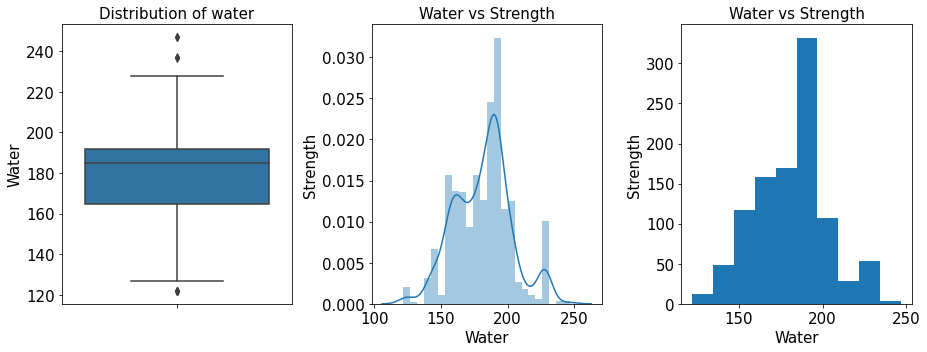

In [9]:

print('Range of values in water: ', df['water'].max()-df['water'].min())
print('Minimum value in water: ', df['water'].min())
print('Maximum value in water: ',df['water'].max())
print('Mean value water: ', df['water'].mean())
print('Median value water: ',df['water'].median())
print('Standard deviation water: ', df['water'].std())
print('Null values water: ',df['water'].isnull().any())
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st Quartile (Q1) in water is: ', Q1)
print('3st Quartile (Q3) in water is: ', Q3)
print('Interquartile range (IQR) in water is ', stats.iqr(df['water']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in water upper : ', df[df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', df[df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(df[df['water']>232.65]['water'].count()*100/len(df)), '%')
print('% of Outlier in water lower: ',round(df[df['water']<124.25]['water'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='water',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Superplastic

Range of values in superplastic:  32.2
Minimum value in superplastic:  0.0
Maximum value in superplastic:  32.2
Mean value in superplastic:  6.204660194174756
Median value in superplastic:  6.4
Standard deviation in superplastic:  5.973841392485508
Null values present in superplastic:  False
1st Quartile (Q1) in superplastic is:  0.0
3st Quartile (Q3) in superplastic is:  10.2
Interquartile range (IQR) in superplastic is  10.2
Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


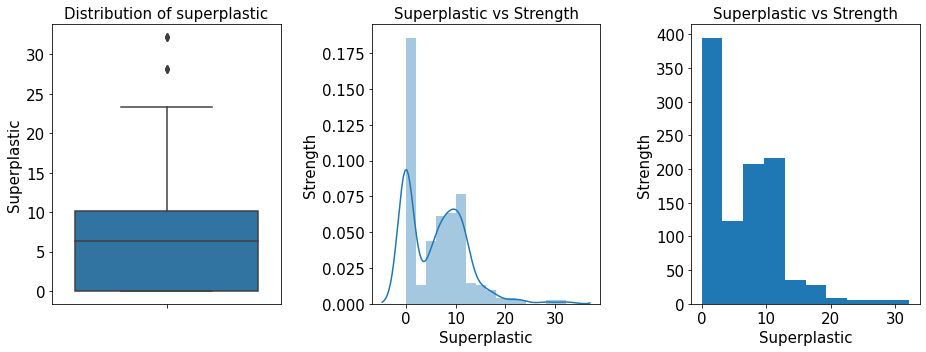

In [10]:

print('Range of values in superplastic: ', df['superplastic'].max()-df['superplastic'].min())
print('Minimum value in superplastic: ', df['superplastic'].min())
print('Maximum value in superplastic: ',df['superplastic'].max())
print('Mean value in superplastic: ', df['superplastic'].mean())
print('Median value in superplastic: ',df['superplastic'].median())
print('Standard deviation in superplastic: ', df['superplastic'].std())
print('Null values present in superplastic: ',df['superplastic'].isnull().any())
Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) in superplastic is: ', Q1)
print('3st Quartile (Q3) in superplastic is: ', Q3)
print('Interquartile range (IQR) in superplastic is ', stats.iqr(df['superplastic']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in superplastic upper : ', df[df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', df[df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(df[df['superplastic']>25.5]['superplastic'].count()*100/len(df)), '%')
print('% of Outlier in superplastic lower: ',round(df[df['superplastic']<-15.3]['superplastic'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='superplastic',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Corseagg

Range of values in coarseagg :  344.0
Minimum value in coarseagg:  801.0
Maximum value in coarseagg:  1145.0
Mean value in coarseagg:  972.918932038835
Median value in coarseagg:  968.0
Standard deviation in coarseagg:  77.75395396672087
Null values in coarseagg:  False
1st Quartile (Q1) in coarseagg is:  932.0
3st Quartile (Q3) in coarseagg is:  1029.4
Interquartile range (IQR) in coarseagg is  97.40000000000009
Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


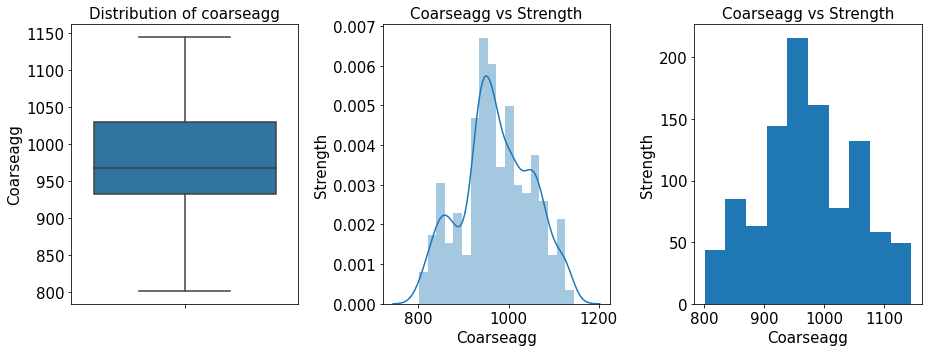

In [11]:

print('Range of values in coarseagg : ', df['coarseagg'].max()-df['coarseagg'].min())
print('Minimum value in coarseagg: ', df['coarseagg'].min())
print('Maximum value in coarseagg: ',df['coarseagg'].max())
print('Mean value in coarseagg: ', df['coarseagg'].mean())
print('Median value in coarseagg: ',df['coarseagg'].median())
print('Standard deviation in coarseagg: ', df['coarseagg'].std())
print('Null values in coarseagg: ',df['coarseagg'].isnull().any())
Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) in coarseagg is: ', Q1)
print('3st Quartile (Q3) in coarseagg is: ', Q3)
print('Interquartile range (IQR) in coarseagg is ', stats.iqr(df['coarseagg']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in coarseagg upper : ', df[df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', df[df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(df[df['coarseagg']>1175.5]['coarseagg'].count()*100/len(df)), '%')
print('% of Outlier in coarseagg lower: ',round(df[df['coarseagg']<785.9]['coarseagg'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='coarseagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Fineagg

Range of values in fineagg:  398.6
Minimum value in fineagg:  594.0
Maximum value in fineagg:  992.6
Mean value in fineagg:  773.5804854368932
Median value in fineagg:  779.5
Standard deviation in fineagg:  80.17598014240443
Null values in fineagg:  False
1st Quartile (Q1) in fineagg is:  730.9499999999999
3st Quartile (Q3) in fineagg is:  824.0
Interquartile range (IQR) in fineagg is  93.05000000000007
Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575
Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


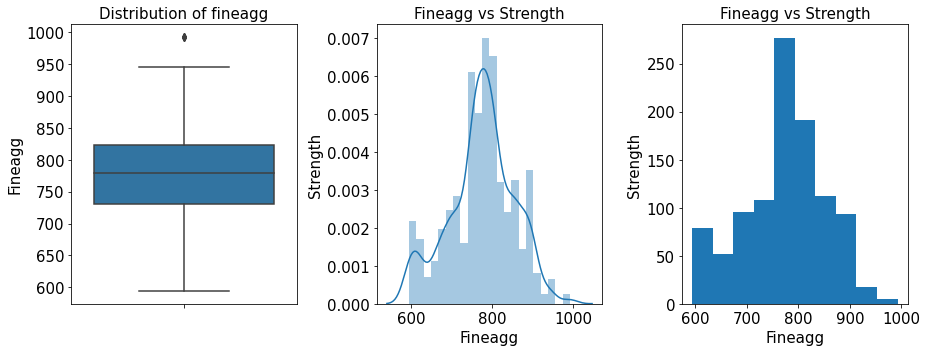

In [12]:

print('Range of values in fineagg: ', df['fineagg'].max()-df['fineagg'].min())
print('Minimum value in fineagg: ', df['fineagg'].min())
print('Maximum value in fineagg: ',df['fineagg'].max())
print('Mean value in fineagg: ', df['fineagg'].mean())
print('Median value in fineagg: ',df['fineagg'].median())
print('Standard deviation in fineagg: ', df['fineagg'].std())
print('Null values in fineagg: ',df['fineagg'].isnull().any())
Q1=df['fineagg'].quantile(q=0.25)
Q3=df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) in fineagg is: ', Q1)
print('3st Quartile (Q3) in fineagg is: ', Q3)
print('Interquartile range (IQR) in fineagg is ', stats.iqr(df['fineagg']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)
print('Number of outliers in fineagg upper : ', df[df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', df[df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(df[df['fineagg']>963.575]['fineagg'].count()*100/len(df)), '%')
print('% of Outlier in fineagg lower: ',round(df[df['fineagg']<591.37]['fineagg'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='fineagg',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Age

Range of values in age:  364
Minimum value in age:  1
Maximum value in age:  365
Mean value in age:  45.662135922330094
Median value in age:  28.0
Standard deviation in age:  63.16991158103279
Null values in age:  False
1st Quartile (Q1) in age is:  7.0
3st Quartile (Q3) in age is:  56.0
Interquartile range (IQR) in age is  49.0
Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


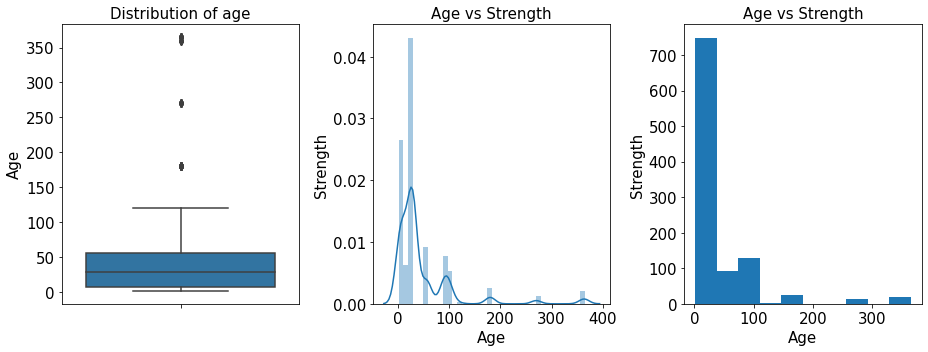

In [13]:

print('Range of values in age: ', df['age'].max()-df['age'].min())
print('Minimum value in age: ', df['age'].min())
print('Maximum value in age: ',df['age'].max())
print('Mean value in age: ', df['age'].mean())
print('Median value in age: ',df['age'].median())
print('Standard deviation in age: ', df['age'].std())
print('Null values in age: ',df['age'].isnull().any())
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st Quartile (Q1) in age is: ', Q1)
print('3st Quartile (Q3) in age is: ', Q3)
print('Interquartile range (IQR) in age is ', stats.iqr(df['age']))
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in age upper : ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ',df[df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(df[df['age']>129.5]['age'].count()*100/len(df)), '%')
print('% of Outlier in age lower: ',round(df[df['age']<-66.5]['age'].count()*100/len(df)), '%')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)
ax3.hist(df['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## From the above analysis we see
### cement is almost normal.
### slag has three gausssians and rightly skewed.
### ash has two gaussians and rightly skewed.
### water has three guassians and slighly left skewed.
### superplastic has two gaussians and rightly skewed.
### coarseagg has three guassians and almost normal.
### fineagg has almost two guassians and looks like normal.
### age has multiple guassians and rightly skewed.

In [15]:
cor=df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


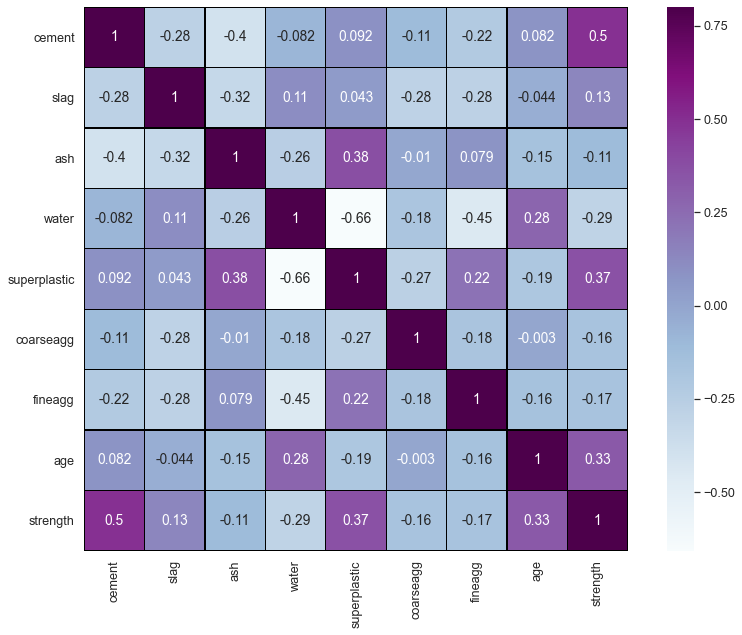

In [16]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")


## From the above correlation analysis we can say that
### Target attribute strength is moderately correlated (positive) to cement and to some level superplastic and age. It is slightly correlated with slag.
### Target attribute is slightly negatively correlated with ash, fineagg and coarseagg. It is negatively correlated with water to some extent.
### superplastic and water are strongly correlated
### fineagg and water are moderately correlated
### cement and ash, ash and superplastic, slag and ash are also correlated to some extent.

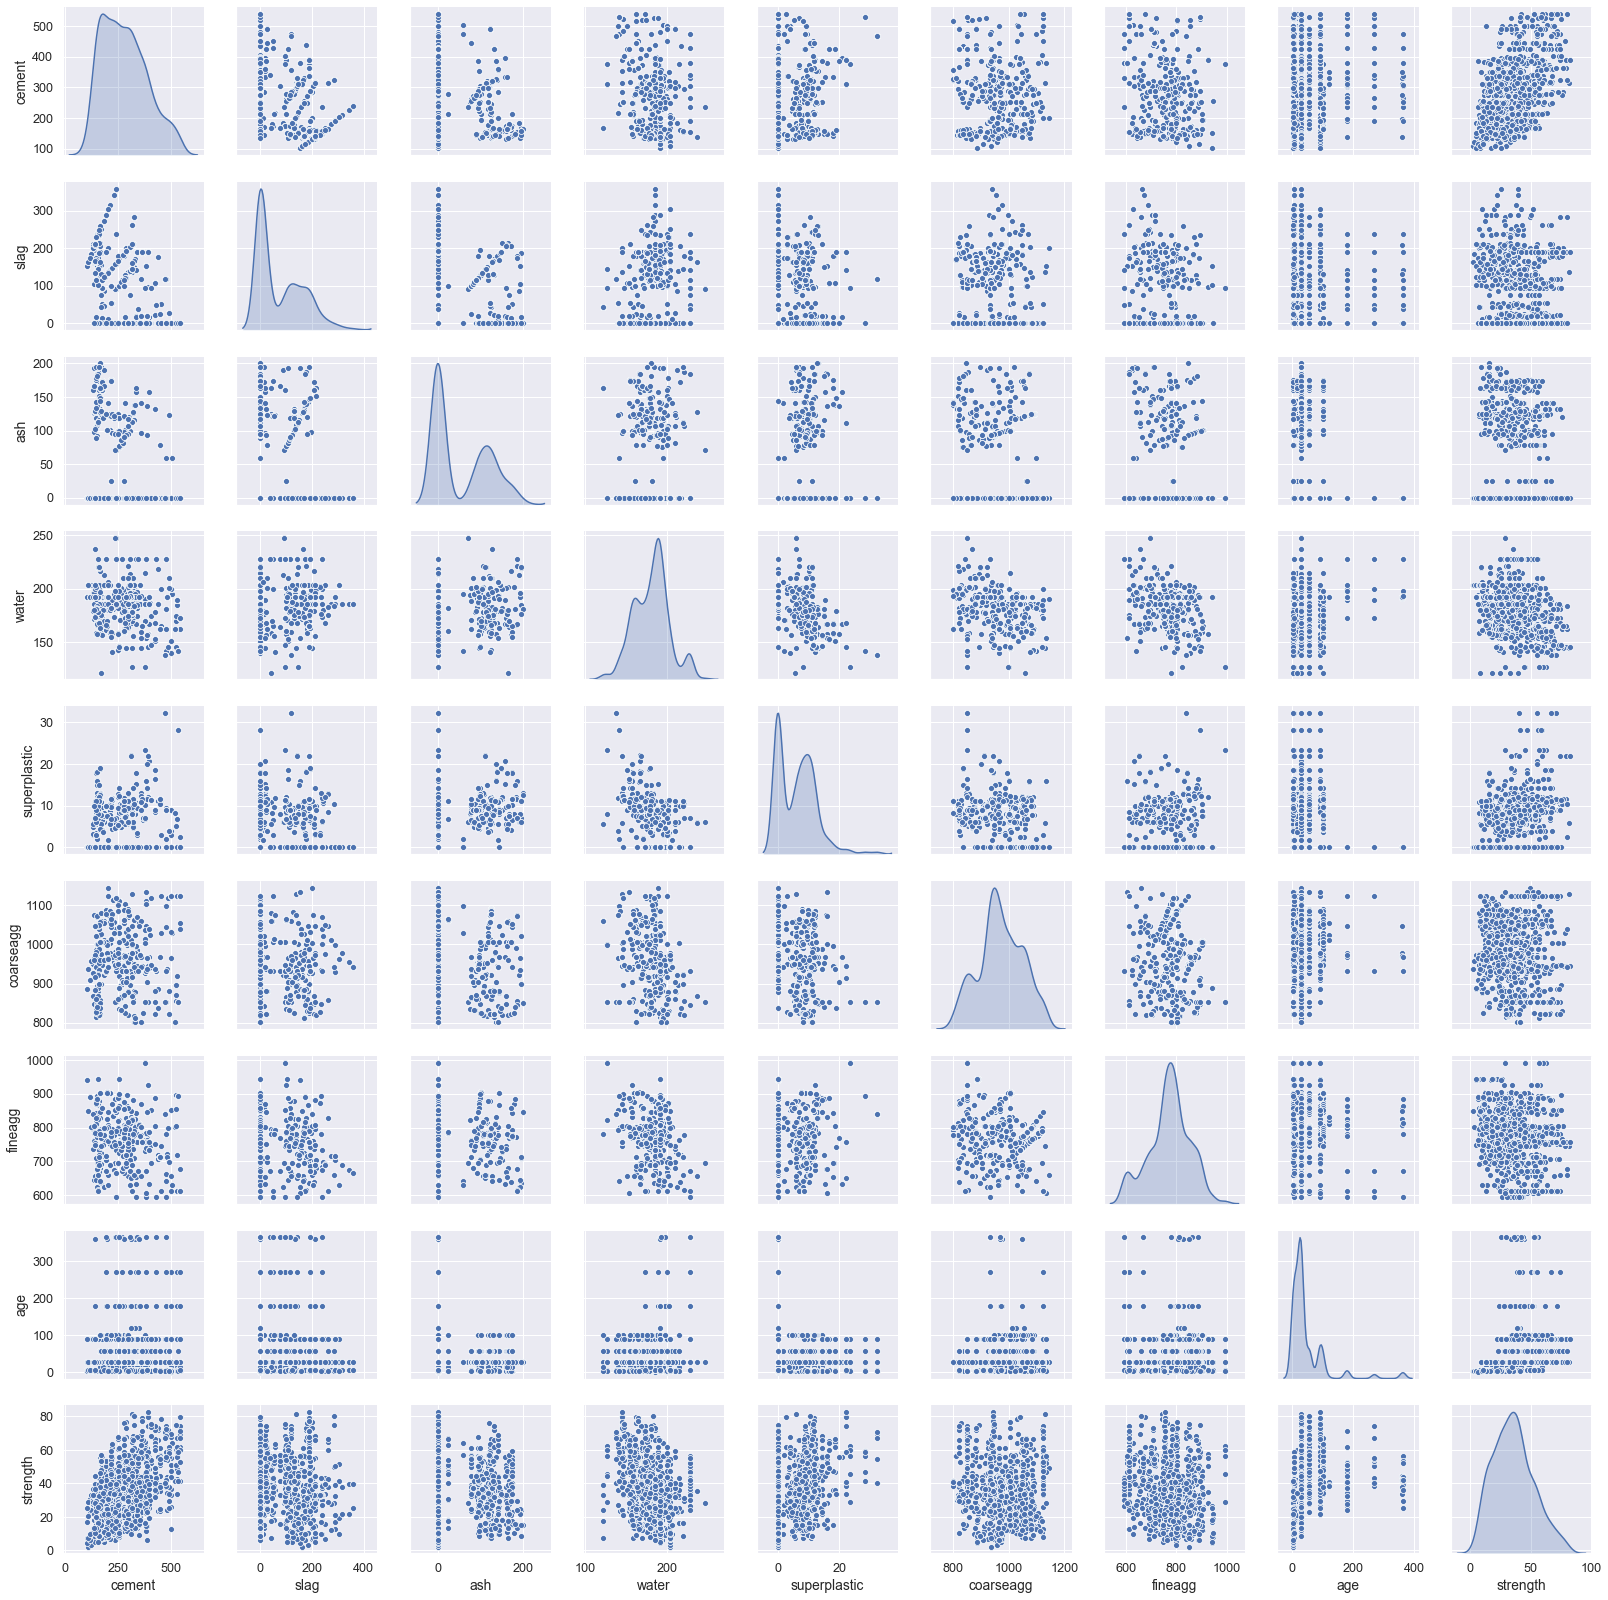

In [17]:
sns.pairplot(df,diag_kind='kde');

## From the above pair plot anlaysis we can see that
### Target attribute strength do not show any kind of relationship with other independent attributes except cement and superplastic. 
### Attributes cement and superplastic seem to have linear relationship with target attribute.
### Attribute water seems to be negatively related with strength
### Attribute age do not show any relation with other independent attributes. Slightly non-linear relation can be observed between age and strength
### fineagg and coarseagg shows slight negative linear relationship with water
### superplastic attribute has negative correlation with the water.
### Except for strength and cement attributes, density curves for most of the attribute show multiple peaks

## From our previous analysis we saw that there are no missing rows, tuples, or missing values

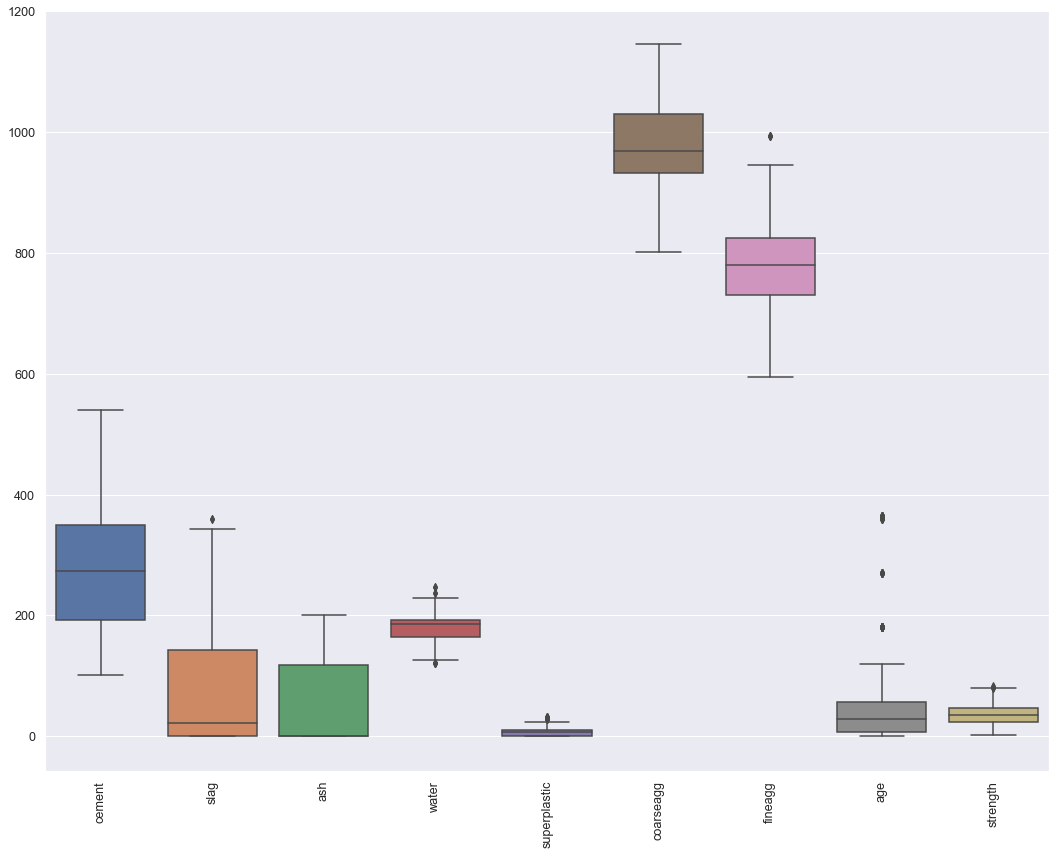

In [18]:

plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

In [19]:
concrete_df1=df.copy()
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


## From the above analysis we see that the dataset has outlier problems
## box-plots of attributes namely slag, ash, superplastic, fineagg, age and strength show presence of outliers above third quartile only.
## water attribute has presence of outliers both below the first quartile as well as above the third quartile

In [20]:
for column in df.columns.tolist(): Q1 = df[column].quantile(.25)
IQR = Q3-Q1
df[column].replace(df.loc[(df[column] > Q3+1.5*IQR)|(df[column] < Q1-1.5*IQR), column], df[column].median(),inplace=True)

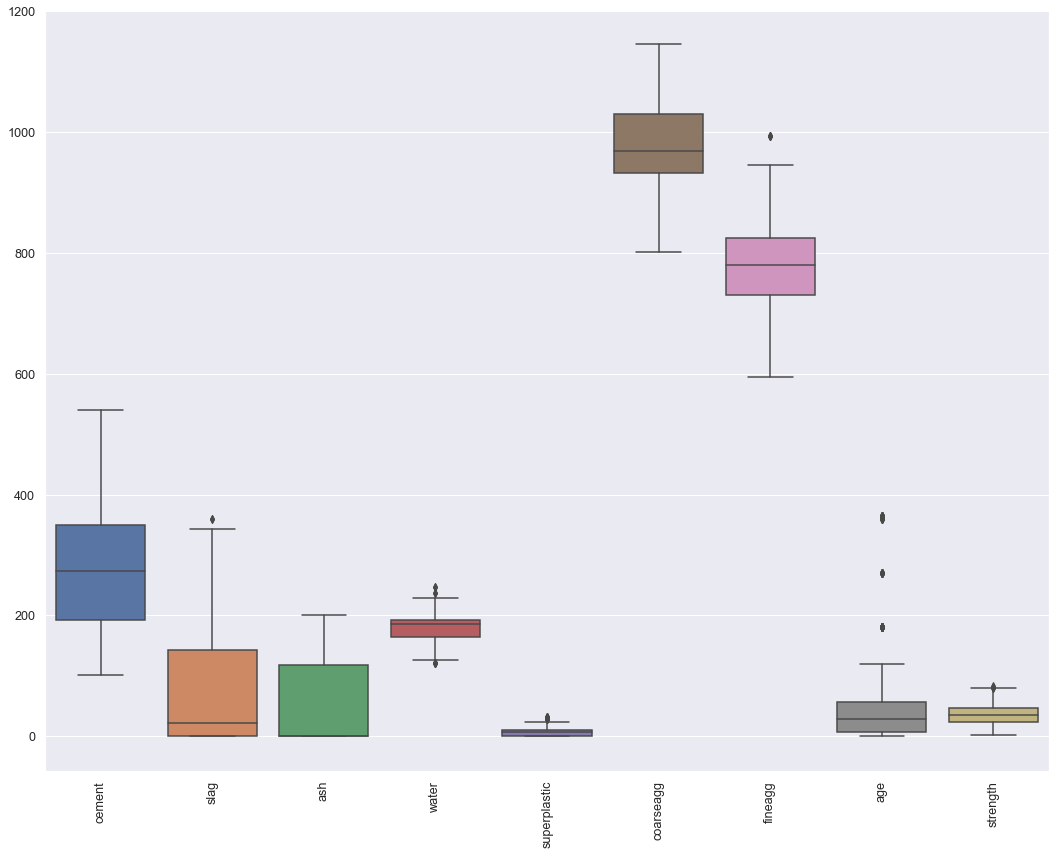

In [21]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=df)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

## We use median method to remove outliers and use quartiles to detect them
## Outliers are completely removed from slag, water, superplastic attributes
## New outliers below first quartile are created in fineagg column. However, we are not going to treat them again.
## Age attribute still shows some outliers
## Outliers in the strength column are not removed completely.

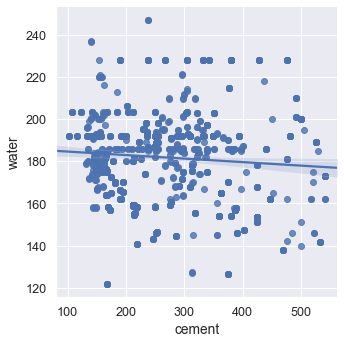

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [22]:

sns.lmplot(x="cement",y="water",data=df)
plt.show()
df.insert(8,'water/cement',df['water']/df['cement'])
df.head()

## We insert a new feature which is water/cement since there is there is a non-linear relationship between water-cement ratio and concrete strength 
## We wil drop features after creating new features

In [23]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,-0.879130,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.357322,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,0.246004,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,0.332968,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,-0.223215,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.034255,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,0.066595,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,-0.029268,0.328873
water/cement,-0.879130,0.357322,0.246004,0.332968,-0.223215,-0.034255,0.066595,-0.029268,1.000000,-0.500692
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,-0.500692,1.000000


In [24]:
poly3 = PolynomialFeatures(degree = 3, interaction_only=True)
poly3_ft = poly3.fit_transform(df.drop('strength',axis=1))
df_poly3= pd.DataFrame(poly3_ft,columns=['feat_'+str(x) for x in range(poly3_ft.shape[1])])
df_poly3.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


## As the data set is very non linear it is advantageous to include quadratic features preferable with degree 3 as we did above

In [25]:
df_feat = df.drop('strength',axis=1).join(df_poly3)
df_feat['strength'] = df['strength']
print(df_feat.shape)
df_feat.head()

(1030, 140)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water/cement,feat_0,...,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,1.0,...,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,1.0,...,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,1.0,...,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,1.0,...,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382,18.29


In [26]:
from sklearn.linear_model import Lasso
X = df_feat.drop('strength',axis=1)
y = df_feat['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso()
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
lasso_feat = X_train.columns[lasso.coef_!=0].tolist() 
print(lasso_feat) 
print("Out of total {} independent features, number of features selected by LASSO regularization are {} ".format(X_train.shape[1],len(lasso_feat)))
df_feat = df_feat[lasso_feat]
df_feat.head()

Lasso model: [ 9.36261145e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.19963541e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.69605615e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.58792934e-03  0.00000000e+00 -0.00000000e+00 -1.73075281e-04
 -2.01176178e-04 -3.56299907e-04 -1.63375790e-03  9.30498802e-05
 -3.59018932e-05 -8.67637327e-05  0.00000000e+00 -4.09362681e-04
  3.02310618e-05  8.18782550e-03 -4.72770847e-05 -1.67582841e-06
  1.71028328e-03 -0.00000000e+00  3.35523632e-04  2.21381349e-03
 -1.30105722e-04  1.18305110e-04  1.31214308e-03  0.00000000e+00
  6.53187043e-03  1.06284484e-04  2.22576434e-04  4.62481310e-04
 -5.85797321e-03  3.40271161e-04 -1.13429938e-03  1.43450818e-02
 -0.00000000e+00  1.17361234e-05 -3.66178099e-05 -1.94916196e-02
  1.81028468e-05 -0.00000000e+00  0.00000000e+00 -1.61238696e-06
  1.46513458e-06 -3.42197516e-07 -5.97228982e-07  4.71200219e-07
 -2.38435007

,cement,fineagg,feat_1,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,748.5,141.3,748.5,29955.60,0.00,28754.55,0.00,137315.34,105763.05,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,796.2,168.9,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,134478.18,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,861.2,250.0,861.2,0.00,23925.00,46850.00,1375.00,239225.00,215300.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,670.0,266.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,178220.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,696.7,154.8,696.7,28390.32,0.00,29922.84,1408.68,162137.52,107849.16,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


## Here above we applied Lasso regularization because there will obviously be not so important featues. The process brings down the attributes from 139 to 118

In [27]:
from sklearn.cluster import KMeans
df_z = df_orig.apply(zscore) 
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:14]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7586.051920
2,3,6368.751485
3,4,5547.883070
4,5,4812.903962
5,6,4352.170216
6,7,4041.006475
7,8,3791.196351
8,9,3601.912838
9,10,3415.959582


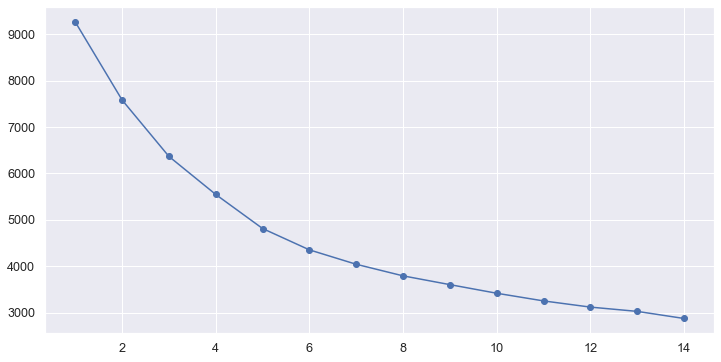

In [28]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

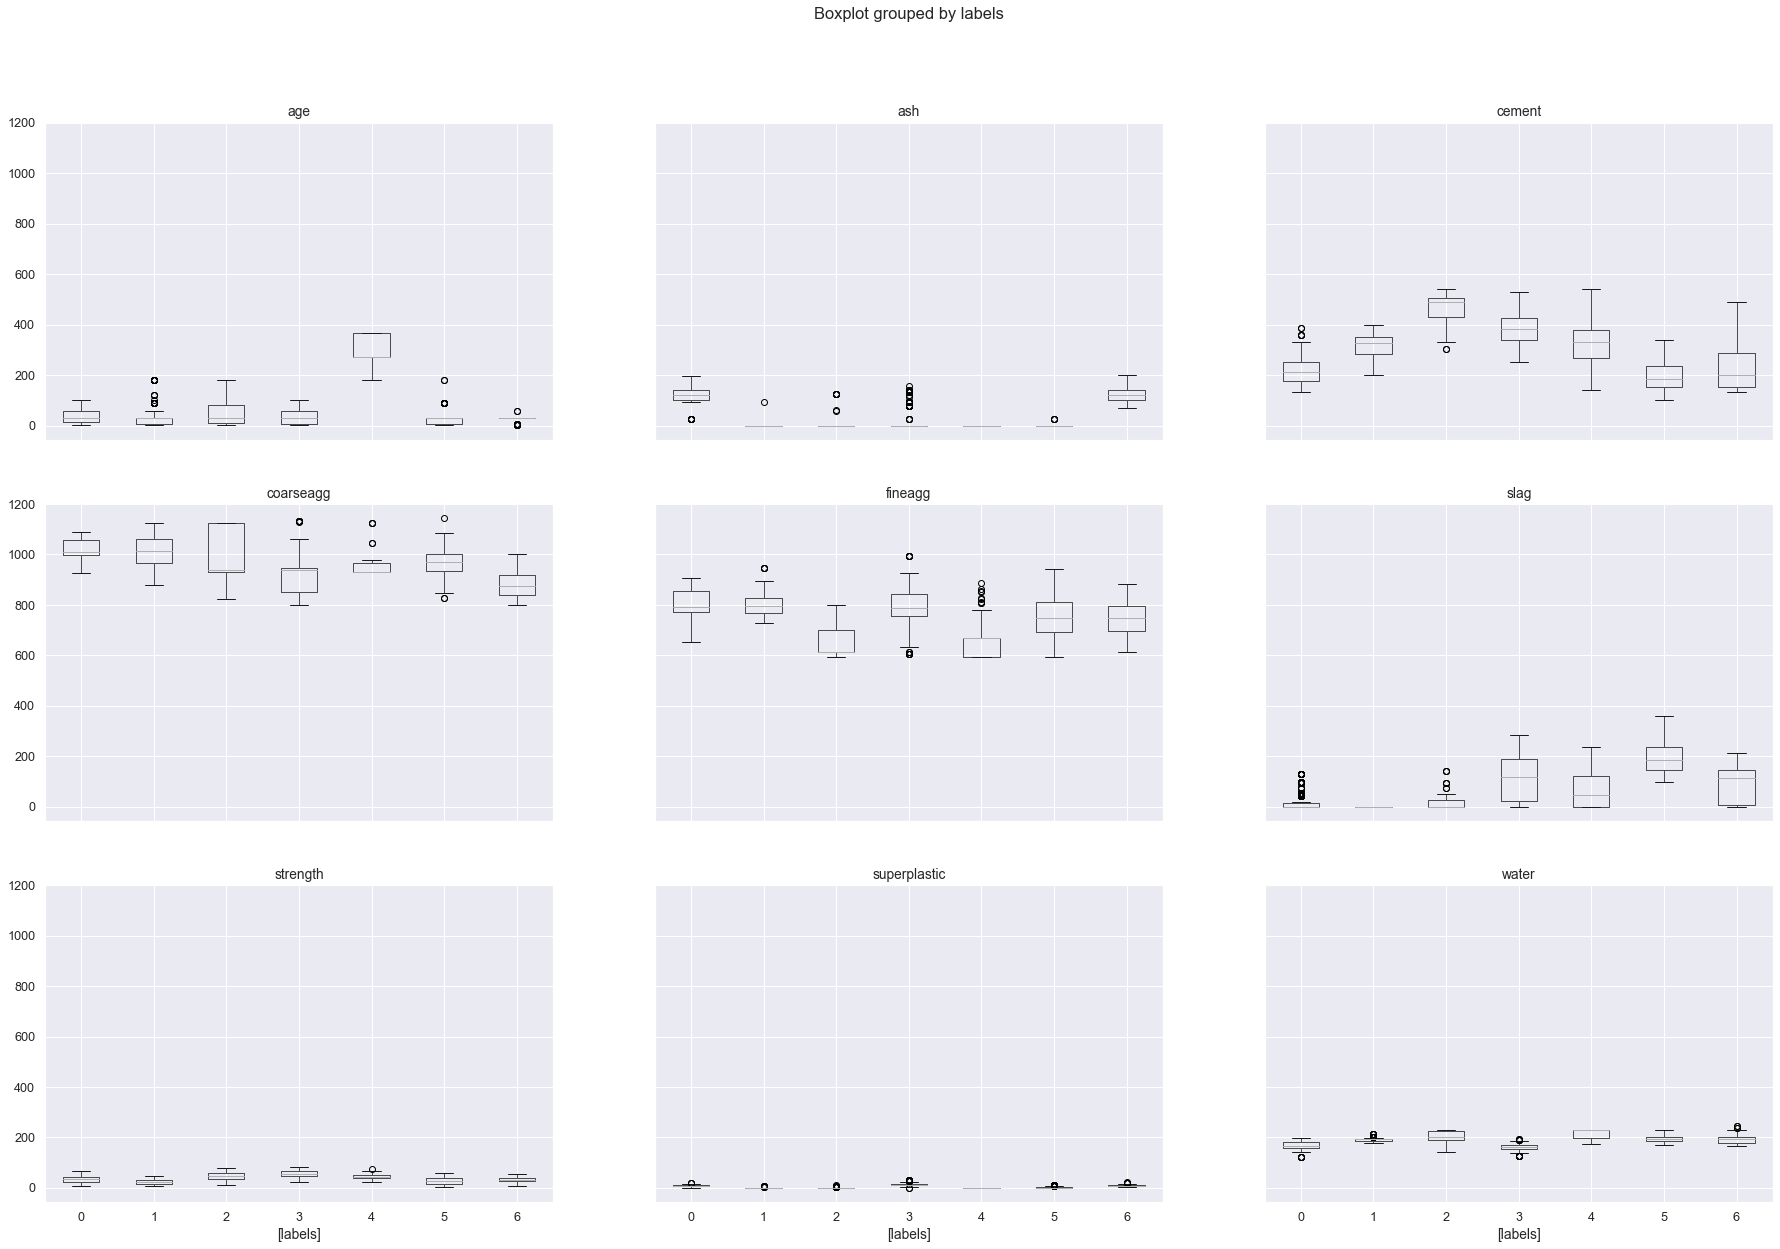

In [29]:
kmeans = KMeans(n_clusters= 7)
kmeans.fit(df_z)
labels = kmeans.labels_
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
df_labeled = df_orig.join(cluster_labels)
df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20));

## Above we use k means clustering to check clusters
## As we see there are no significant clusters in the dataset so hence there would not advisable to cluster the data and continue our analysis

In [30]:
df_orig.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
df_result_raw_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
pipelines = []
pipelines.append(('Linear Regression',Pipeline([('scaler',RobustScaler()),('LR',LinearRegression())])))
pipelines.append(('KNN Regressor',Pipeline([('scaler',RobustScaler()),('KNNR',KNeighborsRegressor())])))
pipelines.append(('SupportVectorRegressor',Pipeline([('scaler',RobustScaler()),('SVR',SVR())])))
pipelines.append(('DecisionTreeRegressor',Pipeline([('scaler',RobustScaler()),('DTR',DecisionTreeRegressor())])))
pipelines.append(('AdaboostRegressor',Pipeline([('scaler',RobustScaler()),('ABR',AdaBoostRegressor())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])))

In [33]:
for ind, val in enumerate(pipelines):
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_raw_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]

In [34]:
df_result_raw_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,60.137578,11.046775
1,KNN Regressor,74.371334,7.992357
2,SupportVectorRegressor,71.528146,7.245810
3,DecisionTreeRegressor,84.930904,4.029861
4,AdaboostRegressor,79.339596,4.368043
5,RandomForestRegressor,89.352507,3.449828
6,BaggingRegressor,89.117133,3.290992
7,GradientBoostRegressor,89.909805,2.821060


In [35]:
df_feat.head()

,cement,fineagg,feat_1,feat_7,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,...,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129
0,141.3,748.5,141.3,748.5,29955.60,0.00,28754.55,0.00,137315.34,105763.05,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,20366984.40,1.047589e+06,39188.368011,30183.673036
1,168.9,796.2,168.9,796.2,7127.58,20994.27,26736.87,1824.12,182547.12,134478.18,...,9293755.968,163416.96,10940.076448,120385.44,8059.297620,141.710835,12047461.44,8.065267e+05,14181.580580,10447.237655
2,250.0,861.2,250.0,861.2,0.00,23925.00,46850.00,1375.00,239225.00,215300.00,...,4532452.540,147362.60,3945.107320,132624.80,3550.555360,115.438400,23074303.84,6.177321e+05,20084.182720,18075.554560
3,266.0,670.0,266.0,670.0,30324.00,0.00,60648.00,0.00,247912.00,178220.00,...,0.000,0.00,0.000000,0.00,0.000000,0.000000,17484320.00,5.352343e+05,22368.000000,16080.000000
4,154.8,696.7,154.8,696.7,28390.32,0.00,29922.84,1408.68,162137.52,107849.16,...,6640484.578,266877.52,11901.860607,177519.16,7916.771324,318.170801,20432260.24,9.112117e+05,36621.109561,24359.296382


In [36]:
X = df_feat
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_result_mod_train = pd.DataFrame({'Regressor':[],'ExplVarianceScore':[],'StdDev':[]})
for ind, val in enumerate(pipelines):
    name, pipeline = val
    kfold = KFold(n_splits=10,random_state=2020) 
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='explained_variance')
    df_result_mod_train.loc[ind] = [name,cv_results.mean()*100,cv_results.std()*100]
df_result_mod_train

,Regressor,ExplVarianceScore,StdDev
0,Linear Regression,69.352328,12.750893
1,KNN Regressor,75.209326,7.368571
2,SupportVectorRegressor,63.341311,7.264523
3,DecisionTreeRegressor,83.883791,3.918301
4,AdaboostRegressor,83.466749,3.441847
5,RandomForestRegressor,88.970332,2.970522
6,BaggingRegressor,89.734524,2.069052
7,GradientBoostRegressor,91.013302,2.518721


## Above we implement multiple models and see the accuracy score and Standard deviation

## Now to try to find feature importance

In [37]:
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_rf = Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])
df_featImp_rf = df_featImp_br = df_featImp_gbr = pd.DataFrame({'Features':[], 'Importance':[]})

In [38]:
pipe_rf.fit(X_train,y_train)
featImp_rf = pipe_rf.steps[1][1].feature_importances_
df_featImp_rf['Features'] = X_train.columns
df_featImp_rf['Importance'] = featImp_rf
df_featImp_rf.sort_values(by='Importance', ascending=False)


,Features,Importance
7,age,0.352857
0,cement,0.297970
3,water,0.104967
4,superplastic,0.088321
1,slag,0.076835
6,fineagg,0.037603
5,coarseagg,0.024787
2,ash,0.016660


In [42]:
pipe_gbr.fit(X_train,y_train)
featImp_gbr = pipe_gbr.steps[1][1].feature_importances_
df_featImp_gbr['Features'] = X_train.columns
df_featImp_gbr['Importance'] = featImp_gbr
df_featImp_gbr.sort_values(by='Importance', ascending=False)

,Features,Importance
7,age,0.359202
0,cement,0.303916
4,superplastic,0.105281
3,water,0.082142
1,slag,0.076518
6,fineagg,0.044495
2,ash,0.015864
5,coarseagg,0.012582


## In the above code, we get feature importance using random forest and Gradient boost regressor
## We get almost similar importance level in both
## In the order age->cement->superplastic->slag<->water->fineagg->corseagg<->ash

## Now in the below process we implement multiple models normally and then remove least imprtant variables and try again and note down the accuracy in the list

In [44]:
concrete_df_z = df.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=df.columns)
X1 = concrete_df_z.drop('strength',axis=1)
y1 = concrete_df_z['strength']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 1)
dt_model = DecisionTreeRegressor()
dt_model.fit(X1_train , y1_train)
y1_pred = dt_model.predict(X1_test)

print('Performance on training data using DT:',dt_model.score(X1_train,y1_train))

print('Performance on testing data using DT:',dt_model.score(X1_test,y1_test))

acc_DT=metrics.r2_score(y1_test, y1_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using DT: 0.9948592392987249
Performance on testing data using DT: 0.8600169940398322
Accuracy DT:  0.8600169940398322
MSE:  0.1461226873869324


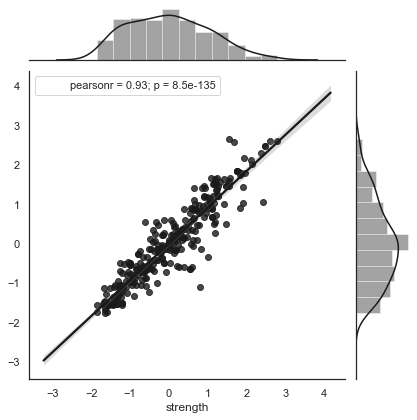

In [45]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y1_test, y=y1_pred, stat_func=pearsonr,kind="reg", color="k");

In [46]:

results1 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017


In [47]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(dt_model,X1, y1, cv=kfold1)
accuracy1=np.mean(abs(results11))
print('Average accuracy: ',accuracy1)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.8785468845389037
Standard Deviation:  0.05985952386980595


In [48]:

tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy1]},index={'2'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547


In [49]:
concrete_df2=concrete_df_z.copy()
X2 = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y2 = concrete_df2['strength']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 1)
dt_model = DecisionTreeRegressor()
dt_model.fit(X2_train , y2_train)
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X2_train.columns))

Feature importances: 
                    Imp
cement        0.029392
slag          0.102611
water         0.047083
superplastic  0.033792
age           0.372006
water/cement  0.415116


In [50]:
y2_pred = dt_model.predict(X2_test)
print('Performance on training data using DT:',dt_model.score(X2_train,y2_train))
print('Performance on testing data using DT:',dt_model.score(X2_test,y2_test))
acc_DT=metrics.r2_score(y2_test, y2_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9944457721854881
Performance on testing data using DT: 0.852124032946476
Accuracy DT:  0.8521240329464761


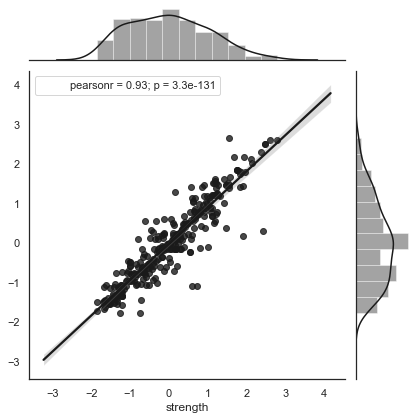

In [51]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y2_test, y=y2_pred, stat_func=pearsonr,kind="reg", color="k");

In [52]:

tempResultsDf = pd.DataFrame({'Method':['Decision Tree2 with imp attr only'], 'accuracy': [acc_DT]},index={'3'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124


In [53]:
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X1_train, y1_train)
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X1_train.columns))


                   Imp
cement        0.000000
slag          0.056938
ash           0.000000
water         0.000000
superplastic  0.000000
coarseagg     0.000000
fineagg       0.019165
age           0.459087
water/cement  0.464810


In [54]:
y1_pred = reg_dt_model.predict(X1_test)
print('Performance on training data using DT:',reg_dt_model.score(X1_train,y1_train))
print('Performance on testing data using DT:',reg_dt_model.score(X1_test,y1_test))
acc_RDT=metrics.r2_score(y1_test, y1_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using DT: 0.7702843188455804
Performance on testing data using DT: 0.7176961152108572
Accuracy DT:  0.7176961152108572
MSE:  0.29468578719404337


In [55]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696


In [56]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(reg_dt_model,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.7001479011845885
Standard Deviation:  0.08241923228716962


In [57]:

tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148


In [58]:
concrete_df3=concrete_df_z.copy()
X2 = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y2 = concrete_df3['strength']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 1)
reg_dt_model = DecisionTreeRegressor( max_depth = 6,random_state=1,min_samples_leaf=10)
reg_dt_model.fit(X2_train, y2_train)
y2_pred = reg_dt_model.predict(X2_test)
print('Performance on training data using DT:',reg_dt_model.score(X2_train,y2_train))
print('Performance on testing data using DT:',reg_dt_model.score(X2_test,y2_test))
acc_RDT=metrics.r2_score(y2_test, y2_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y2_test, y2_pred))


Performance on training data using DT: 0.8720252866450908
Performance on testing data using DT: 0.8245947640846747
Accuracy DT:  0.8245947640846747
MSE:  0.18309854312586643


In [59]:

tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2 with imp attr only'], 'accuracy': [acc_RDT]},index={'6'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595


In [60]:
model_rrf=RandomForestRegressor()
model_rrf.fit(X1_train, y1_train)
y1_pred = model_rrf.predict(X1_test)
print('Performance on training data using RFR:',model_rrf.score(X1_train,y1_train))
print('Performance on testing data using RFR:',model_rrf.score(X1_test,y1_test))
acc_RFR=metrics.r2_score(y1_test, y1_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using RFR: 0.9756613698213126
Performance on testing data using RFR: 0.8933462624869645
Accuracy DT:  0.8933462624869644
MSE:  0.1113315908482479


In [62]:

tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346


In [63]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(model_rrf,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())


Average accuracy:  0.9094212531690575
Standard Deviation:  0.0302089598049294


In [64]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421


In [65]:
model=GradientBoostingRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print('Performance on training data using GBR:',model.score(X1_train,y1_train))
print('Performance on testing data using GBR:',model.score(X1_test,y1_test))
acc_GBR=metrics.r2_score(y1_test, y1_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using GBR: 0.9505047998057449
Performance on testing data using GBR: 0.9113069596619715
Accuracy DT:  0.9113069596619715
MSE:  0.09258313405841648


In [66]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [67]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(model,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.9136843449722901
Standard Deviation:  0.027067712418460687


In [68]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [69]:
model=AdaBoostRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print('Performance on training data using GBR:',model.score(X1_train,y1_train))
print('Performance on testing data using GBR:',model.score(X1_test,y1_test))
acc_ABR=metrics.r2_score(y1_test, y1_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))


Performance on training data using GBR: 0.821252476564605
Performance on testing data using GBR: 0.7796180820958956
Accuracy DT:  0.7796180820958956
MSE:  0.23004791099283414


In [70]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [71]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(model,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.7895676883558118
Standard Deviation:  0.03890933173664389


In [72]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [73]:
model=BaggingRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print('Performance on training data using GBR:',model.score(X1_train,y1_train))
print('Performance on testing data using GBR:',model.score(X1_test,y1_test))
acc_BR=metrics.r2_score(y1_test, y1_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using GBR: 0.9791615880060884
Performance on testing data using GBR: 0.8944238325565782
Accuracy DT:  0.8944238325565782
MSE:  0.11020675834919082


In [74]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [75]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(model,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.913906404231782
Standard Deviation:  0.03176131652896166


In [76]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


Text(0, 0.5, 'Mean error')

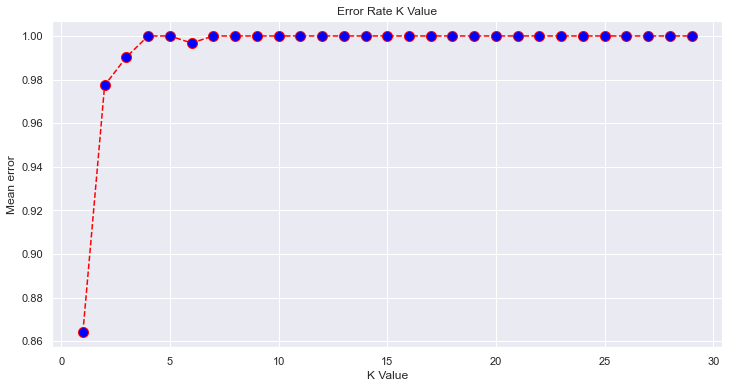

In [77]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X1_train,y1_train)
    pred_i = knn.predict(X1_test)
    error.append(np.mean(pred_i!=y1_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [78]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print('Performance on training data using KNNR:',model.score(X1_train,y1_train))
print('Performance on testing data using KNNR:',model.score(X1_test,y1_test))
acc_K=metrics.r2_score(y1_test, y1_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using KNNR: 0.8472819424950804
Performance on testing data using KNNR: 0.7155061877749275
Accuracy KNNR:  0.7155061877749275
MSE:  0.2969717652663493


In [79]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [80]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(model,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.7252148719712807
Standard Deviation:  0.06297234441304372


In [81]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [82]:
model = SVR(kernel='linear')
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print('Performance on training data using SVR:',model.score(X1_train,y1_train))
print('Performance on testing data using SVR:',model.score(X1_test,y1_test))
acc_S=metrics.r2_score(y1_test, y1_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using SVR: 0.584104103242554
Performance on testing data using SVR: 0.6382101456976792
Accuracy SVR:  0.6382101456976792
MSE:  0.37765802653948444


In [83]:
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [84]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(model,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.558969649402086
Standard Deviation:  0.12075798061803772


In [85]:
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [86]:
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X1_train, y1_train)
y1_pred = evc.predict(X1_test)
print('Performance on training data using ensemble:',evc.score(X1_train,y1_train))
print('Performance on testing data using ensemble:',evc.score(X1_test,y1_test))
acc_E=metrics.r2_score(y1_test, y1_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y1_test, y1_pred))

Performance on training data using ensemble: 0.7424650597958814
Performance on testing data using ensemble: 0.7140243671995034
Accuracy ensemble:  0.7140243671995034
MSE:  0.29851857877575366


In [87]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


In [88]:
num_folds = 18
seed = 5
kfold1 = KFold(n_splits=num_folds, random_state=seed)
results11 = cross_val_score(evc,X1, y1, cv=kfold1)
accuracy=np.mean(abs(results11))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results11.std())

Average accuracy:  0.6906656420612965
Standard Deviation:  0.07005654841704378


In [89]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results1 = pd.concat([results1, tempResultsDf])
results1 = results1[['Method', 'accuracy']]
results1

,Method,accuracy
1,Decision Tree,0.860017
2,Decision Tree k fold,0.878547
3,Decision Tree2 with imp attr only,0.852124
4,Pruned Decision Tree,0.717696
5,Pruned Decision Tree k fold,0.700148
6,Pruned Decision Tree2 with imp attr only,0.824595
7,Random Forest Regressor,0.893346
7,Random Forest Regressor,0.893346
8,Random Forest Regressor k fold,0.909421
9,Gradient Boost Regressor,0.911307


## Here above we see the multiple algorithms we used and their respective accuracy with normal validation and k fold cross validation as well to verify

## Since, the target variable in this problem is non-linear wrt independent variables, any algorithm which captures this non-linear relashionship is suitable for this project. Basic models applicable for this problem can be linear regression with polynomial features, models with nonlinear kernels such as support vector regressor. Decision tree regression model is also suitable since it can also capture nonlinearity however more generalized model such as random forest regression would be more effective. Finally, ensemble regression models which consist of multiple models which either work parallely or sequentially to give final output such as adaboost, bagging and gradient boost regressor should be most effective

## From above analysis, we can conclude that ensemble based regression models namely gradient boost regressor, bagging regressor and random forest regressor are most effective for this problem and we will tune the gradient boosting model for better performance

In [92]:
X = df_orig.drop('strength',axis=1)
y = df_orig['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_gbr = Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])
pipe_gbr.steps[1][1]
param_grid=[{'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }]
search = GridSearchCV(pipe_gbr, param_grid, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.942):
{'GBR__learning_rate': 0.05, 'GBR__max_depth': 6, 'GBR__max_features': 0.3, 'GBR__min_samples_leaf': 9, 'GBR__n_estimators': 1000}


In [93]:
y_pred_train = search.predict(X_train)
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))


Testing Explained Variance Score is  0.9331115388709175
Testing R2 Score is  0.932885031325139


In [94]:
random_grid={'GBR__n_estimators':[100,500,1000], 'GBR__learning_rate': [0.1,0.05,0.02,0.01], 'GBR__max_depth':[4,6], 
            'GBR__min_samples_leaf':[3,5,9,17], 'GBR__max_features':[1.0,0.3,0.1] }
search = RandomizedSearchCV(estimator=pipe_gbr, param_distributions=random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.937):
{'GBR__n_estimators': 500, 'GBR__min_samples_leaf': 3, 'GBR__max_features': 0.3, 'GBR__max_depth': 6, 'GBR__learning_rate': 0.05}


In [95]:
y_pred_test = search.predict(X_test)
from sklearn.metrics import explained_variance_score,r2_score
print('Testing Explained Variance Score is  {}'.format(explained_variance_score(y_test,y_pred_test)))
print('Testing R2 Score is  {}'.format(r2_score(y_test,y_pred_test)))

Testing Explained Variance Score is  0.9269358774235388
Testing R2 Score is  0.926575738670557


## Using GridSearchCV and RandomSearchCv based model tuning we choose the best set of parameters and also see that thethe training and test scores explained variance are about 93%.

In [96]:
concrete_XY = X1.join(y1)
values = concrete_XY.values
n_iterations = 1000        
n_size = int(len(concrete_df_z) * 1)    
stats = list()   
for i in range(n_iterations):
    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    gbmTree = GradientBoostingRegressor(n_estimators=500, max_depth=6,max_features=0.3,min_samples_leaf=9,learning_rate=0.1 )
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    y1_test = test[:,-1]    
    score = gbmTree.score(test[:, :-1] , y1_test)
    predictions = gbmTree.predict(test[:, :-1])  
    stats.append(score)

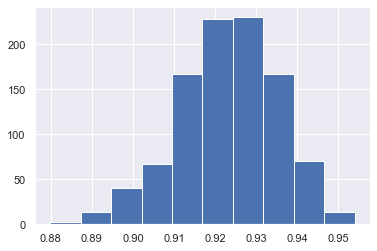

95.0 confidence interval 89.7% and 94.3%


In [98]:
pyplot.hist(stats)
pyplot.show()
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100             
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


## Above is Model performance range at 95% confidence level (Gradient Boosting Regressor - best parameter via GridSearchCV, n_estimators=500, max_depth=6,max_features=0.3,min_samples_leaf=9,learning_rate=0.1) with bootstrap